In [1]:
import numpy as np
import tensorflow as tf
import mplfinance as mpf
import matplotlib.pyplot as plt
import pandas as pd
import streamlit as st

# Stock Prediction Application Demo
### the demo convers these following content:
1, Fetching and processing stock data
2, Defing and traing the LSTM model
3, Predicting and visualising future stock prise


1. fetching and processing stock data
fetch stock data from the data source using the 'get_stock_data' funcion
standardise data and prepare the time series inout from 'preprocess_data' function



Extract'open','high', 'low','close' and ' volume' column
Compute percentage changes and normalize data using 'MixMaxScaler'
concert data into LSTM-compatible time series format

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from src.data import get_stock_data, preprocess_data


ticker = "AAPL"
start_date = "2023-01-01"
end_date = "2023-12-01"

df = get_stock_data(ticker, start=start_date, end=end_date)
print("(Sample Data):")
print(df.head())

sequence_length = 10
X, y, scaler = preprocess_data(df, sequence_length)

print(f"Preprocessing Completed. X shape: {X.shape}, y shape: {y.shape}")

[*********************100%***********************]  1 of 1 completed

(Sample Data):
                  Open        High         Low       Close     Volume
Date                                                                 
2023-01-03  130.279999  130.899994  124.169998  125.070000  112117500
2023-01-04  126.889999  128.660004  125.080002  126.360001   89113600
2023-01-05  127.129997  127.769997  124.760002  125.019997   80962700
2023-01-06  126.010002  130.289993  124.889999  129.619995   87754700
2023-01-09  130.470001  133.410004  129.889999  130.149994   70790800
Preprocessing Completed. X shape: (219, 10, 5), y shape: (219, 4)


Definng and training LSTM model:
defining SLTM model structure using 'StockLSTM'
training the model using the ' train_model' function


Build a multi-layer LSTM model to learn time series features
Train the model using the 'Adam' optimizer and mean squared error loss function.



In [6]:
from src.methods import StockLSTM, train_model

model = StockLSTM(input_size=5, output_size=4)
train_model(model, X, y, epochs=10, batch_size=32, learning_rate=0.001)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.2219 - val_loss: 0.0533
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0356 - val_loss: 0.0420
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0333 - val_loss: 0.0184
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0273 - val_loss: 0.0142
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0225 - val_loss: 0.0131
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0195 - val_loss: 0.0127
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0213 - val_loss: 0.0132
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0197 - val_loss: 0.0116
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0184 - val_loss: 0.0118
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0220 - val_loss: 0.0118


predicting and visualizing Future Prises
Predict future stock prices using the ' predict_future' function
Plot a candlestick chart with predicted data using 'plot_candlestick'


Use the trained model to predict stock prices for the next 30 days
Generate a candlestick chart of predictions combined with recent historical data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━

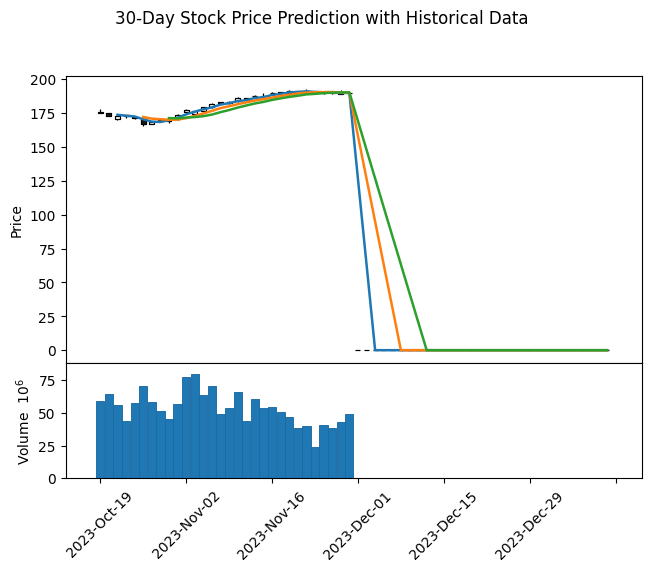

In [7]:
from src.methods import predict_future, plot_candlestick

future_predictions = predict_future(model, X[-1], steps=30, scaler=scaler, sequence_length=sequence_length, input_size=5)

plot_candlestick(future_predictions, df)

Summary:

this note demonstrated how to fetch stock data from a data source and preprocess it into a format suitable for LSTM models.
Built and trained a multi-layer LSTM model to learn time series features.
Showcased the model's application by predicting the next 30 days of stock prices and plotting a candlestick chart.